The stock price simulated using the Euler-Maruyama method. 

δS = rSδt + σS*sqrt(δt)φ

φ = standardized normal distribution.


In [24]:
# Import all relevant python libraries and input data

import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import statistics
from scipy.stats import norm

'''input variables'''

stock_price_So = 100
strike_E = 100
time_to_expiry_years = 1
volatility = 0.20
constant_risk_free_rate_r = 0.05
number_of_step = 100 
number_of_simulation = 1000



In [5]:
# Generating the normal variable
import random
import math


def random_generator():
    rand = 0
    for x in range(12):
        rand = random.random() + rand
    rand = rand - 6   
    return rand

random_generator()

-0.4030118190176335

Sample Data

Today’s stock price S0 = 100

Strike E = 100

Time to expiry (T - t) = 1 year

Volatility σ = 20%

Constant risk-free interest rate r = 5%


In [1]:
# stock simulation
import pandas as pd
import math

def stock_simulation(stock_price,volatility,interest_rate,time_to_expiry,number_of_step,number_of_simulation):
    time_step = time_to_expiry/number_of_step
    keys = range(number_of_simulation)
    dicts = {}
    for f in keys:
        list_1 = list()
        list_1.append(stock_price)
        k = 0        
        for x in range(number_of_step):
            k = (1+interest_rate*time_step+volatility*math.sqrt(time_step)*random_generator())
            k = k*list_1[x]
            list_1.append(k)

        
        dicts[f] = list_1       
    df = pd.DataFrame(dicts)
    
    return df

#stock_simulation(100,0.2,0.05,1,100,100)


In [3]:
# Share price at the expiry of the option

def expiry_share_prices(): 
    list_1 = list()
    df = stock_simulation(100,0.2,0.05,1,500,100)
    df = df.tail(1)
    list_1 = df.values.tolist()
    list_1 = list_1[0]
    
    return list_1

#expiry_share_prices()

In [20]:
#call option value
import statistics 

def call_option_value():
    list_1 = list()
    list_2 = list()
    list_1 = expiry_share_prices()
    
    for x in list_1:
        max_1 = max(x-strike_E,0)
        list_2.append(max_1)
    
    individual_call_payoff = np.array(list_2)*math.exp(-constant_risk_free_rate_r*time_to_expiry_years)
    call_average = statistics.mean(list_2)
    call_payoff = call_average*math.exp(-constant_risk_free_rate_r*time_to_expiry_years)
    return call_average, call_payoff, individual_call_payoff

#call_option_value()


In [19]:
# put option value
import statistics

def put_option_value():
    list_1 = list()
    list_2 = list()
    list_1 = expiry_share_prices()
    
    for x in list_1:
        max_1 = max(strike_E-x,0) 
        list_2.append(max_1)
    individual_put_payoff = np.array(list_2)*math.exp(-constant_risk_free_rate_r*time_to_expiry_years)
    put_average = statistics.mean(list_2)
    put_payoff = put_average*math.exp(-constant_risk_free_rate_r*time_to_expiry_years)
    return put_average, put_payoff, individual_put_payoff


    
#put_option_value()


Black-Scholes price of a Binary call option

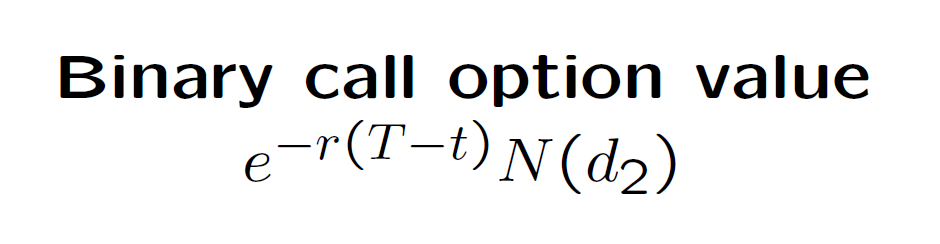


Black-Scholes price of a Binary put option

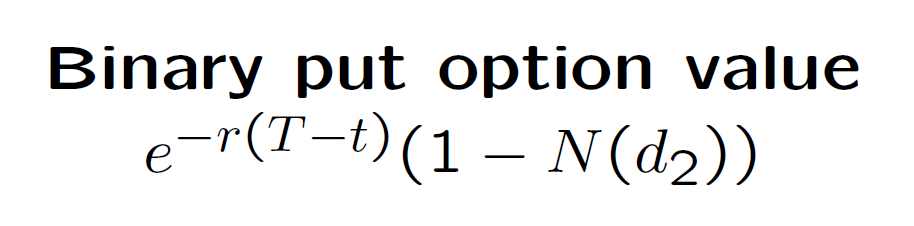



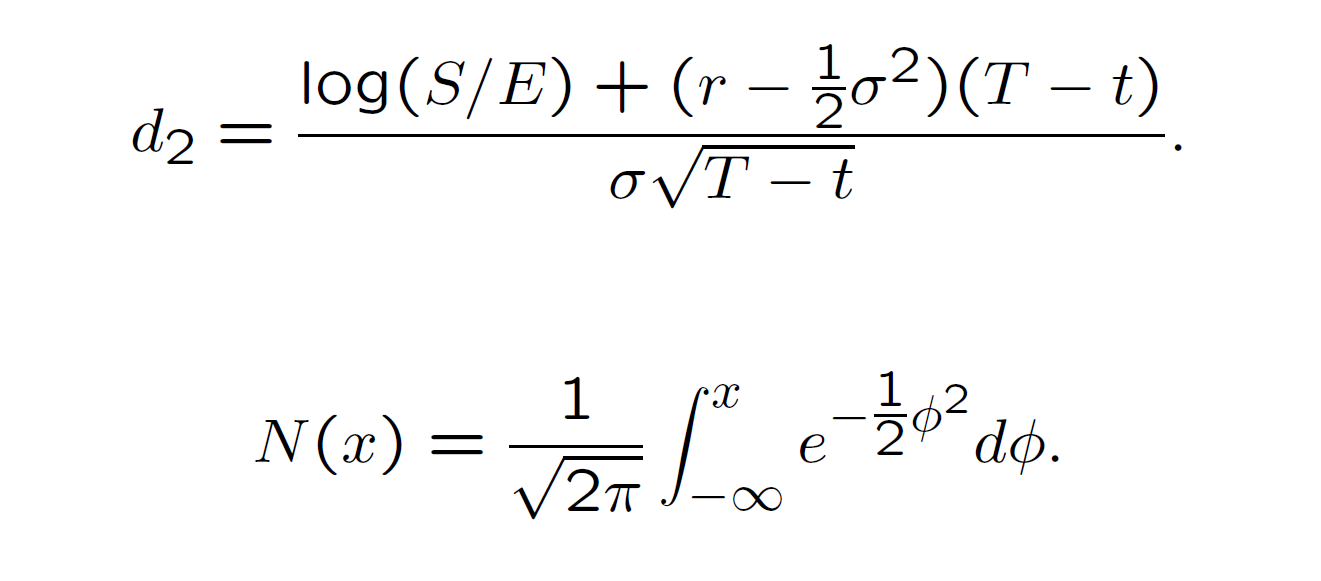

In [8]:
# Calculation of the d2 value
import numpy as np

stock_price_So = 100
strike_E = 100
time_to_expiry_years = 1
volatility = 0.20
constant_risk_free_rate_r = 0.05

d2 = (np.log(stock_price_So/strike_E) + (constant_risk_free_rate_r - 0.5*(volatility**2))*time_to_expiry_years)/(volatility*time_to_expiry_years)


In [9]:
from scipy.stats import norm

N_x = norm.pdf(d2)
N_x

0.39447933090788895

In [15]:
# Black-Scholes price of a Binary call option

call_average, call_payoff, individual_call_payoff = call_option_value()

Black_Scholes_price_Binary_call = np.exp(-constant_risk_free_rate_r*1)*N_x
Black_Scholes_price_Binary_call_value = Black_Scholes_price_Binary_call*call_average
Black_Scholes_price_Binary_call_value



4.968146308229593

In [18]:
# Black-Scholes price of a Binary put option

put_average, put_payoff, individual_put_payoff = put_option_value()   

Black_Scholes_price_Binary_put = np.exp(-constant_risk_free_rate_r*1)*(1-N_x)
Black_Scholes_price_Binary_put_value = Black_Scholes_price_Binary_put*put_average
Black_Scholes_price_Binary_put_value



3.916705166179822

Error calculation

Standard Error (SE) = Standard deviation of the option/ sqrt (Number of simulations)

Standard deviation (SD) of the option = sqrt (ϵ(each simulation option payoff – Black Scholes option price)^2/( Number of simulations – 1)


In [25]:
# Error Calculation
call_SD = np.sqrt(sum((individual_call_payoff - Black_Scholes_price_Binary_call_value )**2)/(number_of_simulation-1))
call_SE = call_SD/np.sqrt(number_of_simulation)
print(call_SE)
put_SD = np.sqrt(sum((individual_put_payoff - Black_Scholes_price_Binary_put_value )**2)/(number_of_simulation-1))
put_SE = put_SD/np.sqrt(number_of_simulation)
print(put_SE)


0.20578357296201402
0.09490011657834357


## Error Table

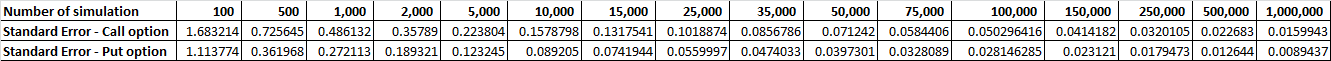

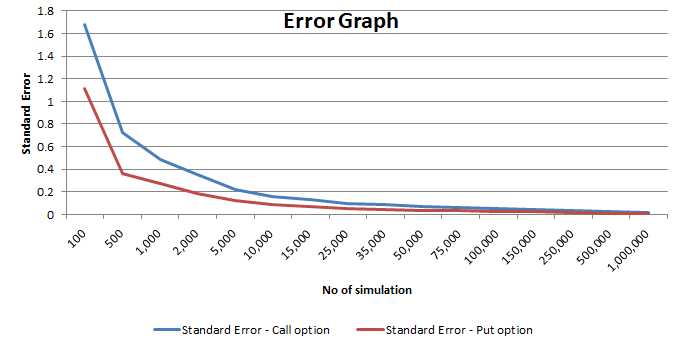

## Observations

•	Put option has lower Standard error compared to the call option for all the simulations.

•	Standard error decrease in diminution rate with the number of simulations.


No impact on standard error from increase in the time step 
  
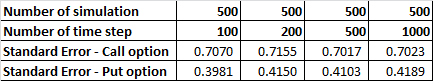

Both call and put option’s standard deviation show close to zero correlation to the number of simulations.


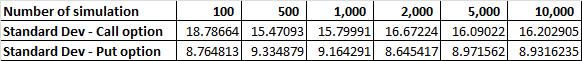

## Problem encountered

•	Over 1,000,000 simulation required considerable computing power (Time consuming) 

•	Model will be significantly more complicated by the early exercising possibility of the American option


## Conclusion

Although the standard Error significantly reduces with the number of simulations, the option standard deviation shows a little change.  This is reducing anyone’s confidence in the model.  Put option has lower standard error due to the limited upside of the option. (Max (Strike –Stock price, 0)


# Complete Code

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Oct 13 15:43:12 2019

@author: maheshp
"""


import pandas as pd
import numpy as np
import random
import math
import statistics
from scipy.stats import norm

'''input variables'''

stock_price_So = 100
strike_E = 100
time_to_expiry_years = 1
volatility = 0.20
constant_risk_free_rate_r = 0.05
number_of_step = 100
number_of_simulation = 1000




def random_generator():
    rand = 0
    for x in range(12):
        rand = random.random() + rand
    rand = rand - 6   
    return rand


def stock_simulation(stock_price_So,volatility,constant_risk_free_rate_r,time_to_expiry_years,number_of_step,number_of_simulation):
    time_step = time_to_expiry_years/number_of_step
    keys = range(number_of_simulation)
    dicts = {}
    for f in keys:
        list_1 = list()
        list_1.append(stock_price_So)
        k = 0
        
        for x in range(number_of_step):
            k = (1+constant_risk_free_rate_r*time_step+volatility*math.sqrt(time_step)*random_generator())
            k = k*list_1[x]
            list_1.append(k)
        
        dicts[f] = list_1       
    df = pd.DataFrame(dicts)
    
    return df

df_data= stock_simulation(stock_price_So,volatility,constant_risk_free_rate_r,time_to_expiry_years,number_of_step,number_of_simulation)

    
def expiry_share_prices(): 
    list_1 = list()
    df = df_data
    df = df.tail(1)
    list_1 = df.values.tolist()
    list_1 = list_1[0]
    
    return list_1


def call_option_value():
    list_1 = list()
    list_2 = list()
    list_1 = expiry_share_prices()
    
    for x in list_1:
        max_1 = max(x-strike_E,0)
        list_2.append(max_1)
    
    individual_call_payoff = np.array(list_2)*math.exp(-constant_risk_free_rate_r*time_to_expiry_years)
    call_average = statistics.mean(list_2)
    call_payoff = call_average*math.exp(-constant_risk_free_rate_r*time_to_expiry_years)
    return call_average, call_payoff, individual_call_payoff
    
def put_option_value():
    list_1 = list()
    list_2 = list()
    list_1 = expiry_share_prices()
    
    for x in list_1:
        max_1 = max(strike_E-x,0) 
        list_2.append(max_1)
    individual_put_payoff = np.array(list_2)*math.exp(-constant_risk_free_rate_r*time_to_expiry_years)
    put_average = statistics.mean(list_2)
    put_payoff = put_average*math.exp(-constant_risk_free_rate_r*time_to_expiry_years)
    return put_average, put_payoff, individual_put_payoff

call_average, call_payoff, individual_call_payoff = call_option_value()
put_average, put_payoff, individual_put_payoff = put_option_value()    


'''Black-Scholes price of a Binary option'''

def black_scholes_option_price():
    

    d2 = (np.log(stock_price_So/strike_E) + (constant_risk_free_rate_r - 0.5*(volatility**2))*time_to_expiry_years)/(volatility*time_to_expiry_years)
    N_x = norm.pdf(d2)


    Black_Scholes_price_Binary_call = np.exp(-constant_risk_free_rate_r*time_to_expiry_years)*N_x
    Black_Scholes_price_Binary_call_value = Black_Scholes_price_Binary_call*call_average
    

    
    Black_Scholes_price_Binary_put = np.exp(-constant_risk_free_rate_r*time_to_expiry_years)*(1-N_x)
    Black_Scholes_price_Binary_put_value = Black_Scholes_price_Binary_put*put_average
    

    
    call_SD = np.sqrt(sum((individual_call_payoff - Black_Scholes_price_Binary_call_value )**2)/(number_of_simulation-1))
    call_SE = call_SD/np.sqrt(number_of_simulation)
    put_SD = np.sqrt(sum((individual_put_payoff - Black_Scholes_price_Binary_put_value )**2)/(number_of_simulation-1))
    put_SE = put_SD/np.sqrt(number_of_simulation)
    
    return call_SE, put_SE, call_SD, put_SD



#Error Graph
    
dicts = {}    # adding values to dictionary
call_SE, put_SE, call_SD, put_SD = black_scholes_option_price()

dicts = {'Number of time step':number_of_step,'No of simulation': number_of_simulation,'Call option standard error': call_SE,'Put option standard error': put_SE,'Call option standard deviation':call_SD, 'Put option standard deviation':put_SD}

print(dicts)












{'Number of time step': 100, 'No of simulation': 1000, 'Call option standard error': 0.48211811662321424, 'Put option standard error': 0.28680999246555156, 'Call option standard deviation': 15.245913497600437, 'Put option standard deviation': 9.069728318868748}
